In [1]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, RobustScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

## Загрузка датасета

In [2]:
credit = pd.read_csv('BankChurners.csv') # https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data
credit = credit.drop(columns = credit.columns[-2:])
credit.columns = credit.columns.str.lower()

In [3]:
credit.isnull().sum() # нулевых значений нет

clientnum                   0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [4]:
credit.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
clientnum,10127.0,739177606.3,36903783.5,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
customer_age,10127.0,46.3,8.0,26.0,41.0,46.0,52.0,73.0
dependent_count,10127.0,2.3,1.3,0.0,1.0,2.0,3.0,5.0
months_on_book,10127.0,35.9,8.0,13.0,31.0,36.0,40.0,56.0
total_relationship_count,10127.0,3.8,1.6,1.0,3.0,4.0,5.0,6.0
months_inactive_12_mon,10127.0,2.3,1.0,0.0,2.0,2.0,3.0,6.0
contacts_count_12_mon,10127.0,2.5,1.1,0.0,2.0,2.0,3.0,6.0
credit_limit,10127.0,8632.0,9088.8,1438.3,2555.0,4549.0,11067.5,34516.0
total_revolving_bal,10127.0,1162.8,815.0,0.0,359.0,1276.0,1784.0,2517.0
avg_open_to_buy,10127.0,7469.1,9090.7,3.0,1324.5,3474.0,9859.0,34516.0


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [6]:
credit['income_category'].value_counts()

income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

C:\Users\sekin\AppData\Local\Temp\ipykernel_20108\2444821933.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([male["total_trans_amt"], female["total_trans_amt"]], widths = 0.5,labels = ["man", "female"], vert = False)


Text(0.5, 1.0, 'Денежный оборот на кредитной карте, зависящий от пола')

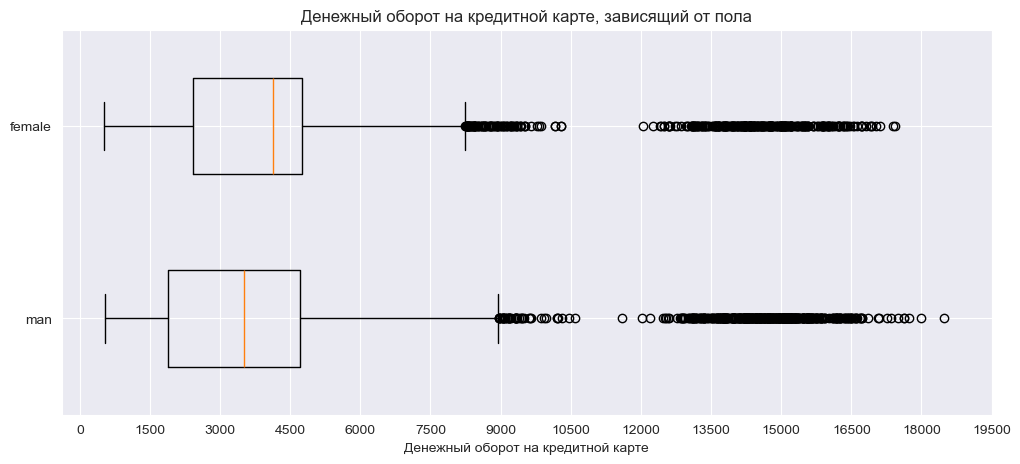

In [7]:
 
task_3_1 = credit[["gender", "total_trans_amt"]]
male = task_3_1.query("gender == 'M'")
female = task_3_1.query("gender == 'F'")

fig, ax = plt.subplots(figsize = (12,5))

ax.boxplot([male["total_trans_amt"], female["total_trans_amt"]], widths = 0.5,labels = ["man", "female"], vert = False)

plt.xlabel('Денежный оборот на кредитной карте')
plt.xticks(np.arange(0, 20000, 1500))
plt.title("Денежный оборот на кредитной карте, зависящий от пола")
